#### Proyecto

Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios llegan a la etapa de compra. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

Luego, observa los resultados de un test A/A/B (sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import math

#### 1. Abrir el archivo de datos y leer la información general

In [2]:
data= pd.read_csv('logs_exp_us.csv', sep='\t')

#### 2. Preparar los datos para el análisis

In [3]:
# vamos a verificar los sets de datos 
print(f' Total de datos duplicados: {data.duplicated().sum()}')
print(f' Total de datos nulos: \n{data.isnull().sum()}')
data.info()
data.head()

 Total de datos duplicados: 413
 Total de datos nulos: 
EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
data['EventTimestamp']= pd.to_datetime(data['EventTimestamp'].astype('int64'), unit='s')
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [5]:
data.columns=['event_name', 'user_id', 'time_stamp', 'exp_id']
data.head() 

,event_name,user_id,time_stamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [6]:
data['date']= pd.to_datetime(data['time_stamp'].dt.date)
data['hour']= data['time_stamp'].dt.time
data.head()

,event_name,user_id,time_stamp,exp_id,date,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42


In [7]:
data= data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [8]:
print(f' Total de datos duplicados: {data.duplicated().sum()}')
print(f' Total de datos nulos: \n{data.isnull().sum()}')
data.info()
data.head()

 Total de datos duplicados: 0
 Total de datos nulos: 
event_name    0
user_id       0
time_stamp    0
exp_id        0
date          0
hour          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   time_stamp  243713 non-null  datetime64[ns]
 3   exp_id      243713 non-null  int64         
 4   date        243713 non-null  datetime64[ns]
 5   hour        243713 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 13.0+ MB


,event_name,user_id,time_stamp,exp_id,date,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42


Como pudimos observar inicialmente los datos presentaban varios tipos de problemas para su lectura, se ajustaron los duplicados los cuales representaban un porcentaje bastante bajo, igualmente se agregaron las columnas respectivas para ayudarnos en el analisis posterior, e igualmente se ajustaron al tipo correcto de dato necesario. 

#### 3. Estudiar y comprobar los datos

##### ¿Cuántos eventos hay en los registros?

In [9]:
print(f' la cantidad de eventos que tienen los registros son: {data['event_name'].nunique()}')
print(data['event_name'].unique())

 la cantidad de eventos que tienen los registros son: 5
['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


##### ¿Cuántos usuarios hay en los registros?

In [10]:
print(f'Total de registros: {len(data)}')
print(f'Total de usuarios unicos en los registros: {data['user_id'].nunique()}')

Total de registros: 243713
Total de usuarios unicos en los registros: 7551


##### ¿Cuál es el promedio de eventos por usuario?

In [11]:
user_mean= data.groupby('user_id')['event_name'].count().mean()
print(f' El promedio de eventos por usuario es de: {user_mean:.2f}')

 El promedio de eventos por usuario es de: 32.28


##### ¿Qué periodo de tiempo cubren los datos? 

In [12]:
print(f' Los datos cubren el perido de tiempo desde: {data['date'].min()} Hasta: {data['date'].max()}')

 Los datos cubren el perido de tiempo desde: 2019-07-25 00:00:00 Hasta: 2019-08-07 00:00:00


##### ¿Qué periodo representan realmente los datos?

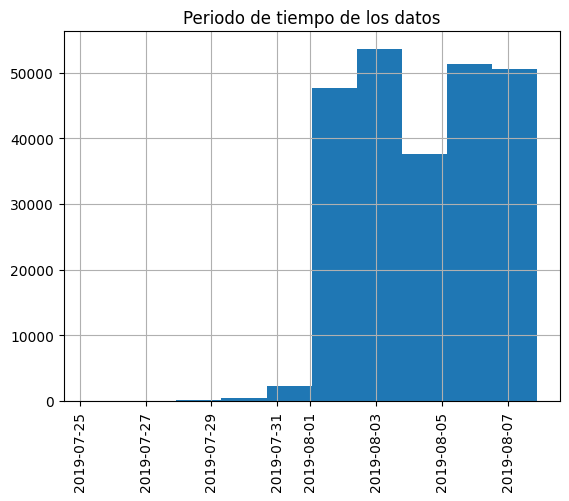

In [13]:
data['time_stamp'].hist()
plt.title('Periodo de tiempo de los datos')
plt.xticks(rotation=90)
plt.show()

Como pudimos observar los datos cubren desde: 2019-07-25 Hasta: 2019-08-07, sin embargo al verificar notamos que los datos del mes de julio son minimos, por lo cual se considera descartarlos.

In [14]:
data_fil= data[data['date']> '2019-07-31']
data_fil.info()
data_fil.head()

<class 'pandas.core.frame.DataFrame'>
Index: 240887 entries, 2828 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  240887 non-null  object        
 1   user_id     240887 non-null  int64         
 2   time_stamp  240887 non-null  datetime64[ns]
 3   exp_id      240887 non-null  int64         
 4   date        240887 non-null  datetime64[ns]
 5   hour        240887 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 12.9+ MB


,event_name,user_id,time_stamp,exp_id,date,hour
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,00:08:59


In [15]:
# usuarios
data_user_loss= (1-(data_fil['user_id'].nunique()/ data['user_id'].nunique()))*100 
print(f'El total de usuarios que estaban por debajo de los datos filtrados es equivalente al: {data_user_loss:.2f}% del total de los datos')

El total de usuarios que estaban por debajo de los datos filtrados es equivalente al: 0.23% del total de los datos


In [16]:
# Eventos
data_event_loss= (1-(len(data_fil)/ len(data)))*100 
print(f'El total de eventos que estaban por debajo de los datos filtrados es equivalente al: {data_event_loss:.2f}% del total de los datos')

El total de eventos que estaban por debajo de los datos filtrados es equivalente al: 1.16% del total de los datos


##### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

Como se pudo observar los datos eliminados no eran representativos al filtrar mantenemos cerca del 98% de los datos.

In [17]:
data_fil.groupby('exp_id')['user_id'].count().reset_index()

,exp_id,user_id
0,246,79302
1,247,77022
2,248,84563


In [18]:
data_fil.groupby('exp_id')['user_id'].nunique().reset_index()

,exp_id,user_id
0,246,2484
1,247,2513
2,248,2537


Al realizar el filtrado y revisar la cantidad de datos que tenemos por grupo observamos que no hay mucha diferencia tanto entre el total de los datos como en la cantidad de usuarios unicos por experimento

#### 4. Estudiar el embudo de eventos

##### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [19]:
data_fil['event_name'].value_counts()

event_name
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: count, dtype: int64

##### Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios.

In [20]:
funnel_by_users= data_fil.groupby('event_name')['user_id'].nunique().sort_values(ascending= False).reset_index()
funnel_by_users

,event_name,user_id
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


##### Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [21]:
funnel_by_users['user_ps']= funnel_by_users['user_id'].shift(1)
funnel_by_users['convertio_rate']= funnel_by_users['user_id']/ funnel_by_users['user_ps']
funnel_by_users

,event_name,user_id,user_ps,convertio_rate
0,MainScreenAppear,7419,NaN,NaN
1,OffersScreenAppear,4593,7419.0,0.619086
2,CartScreenAppear,3734,4593.0,0.812976
3,PaymentScreenSuccessful,3539,3734.0,0.947777
4,Tutorial,840,3539.0,0.237355


#### ¿En qué orden crees que ocurrieron las acciones?
Como podemos observar el orden de las acciones seria Main Screen --> Offer Screen --> Cart Screen --> Payment Screen.
la parte de tutorial no tiene sentido en la secuencia por lo que se presume que es un paso adicional que muy pocas personas realizan 

##### Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente

In [22]:
fig = go.Figure(go.Funnel(
    y= funnel_by_users['event_name'],
    x= funnel_by_users['user_id'],
    textinfo= 'value+percent initial'))
fig.show()

##### ¿En qué etapa pierdes más usuarios?
La etapa en la que se pierden mas usuarios es la etapa 2(Oferta) al parecer los usuarios ingresan a la pagina pero no revisan los productos a ofrecer

##### ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?
El porcentje de usuarios que finalizan los pasos desde el inicio hasta el fin es igual al 48% del total de los usuarios.


#### 5. Estudiar los resultados del experimento

##### ¿Cuántos usuarios hay en cada grupo?

In [23]:
data_fil.groupby('exp_id')['user_id'].nunique().reset_index()

,exp_id,user_id
0,246,2484
1,247,2513
2,248,2537


In [24]:
data_fil= data_fil[data_fil['event_name']!='Tutorial']
users_by_event_by_exp= data_fil.pivot_table(
    index='event_name',
    columns='exp_id',
    values='user_id',
    aggfunc='nunique')
users_by_event_by_exp

exp_id,246,247,248
event_name,,,
CartScreenAppear,1266,1238,1230
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
PaymentScreenSuccessful,1200,1158,1181


In [25]:
# Vamos a verificar si hay usuarios que este en mas de un grupo
# Agrupar por user_id y contar los exp_id únicos
user_groups = data_fil.groupby('user_id')['exp_id'].nunique().reset_index()

# Filtrar usuarios con más de 1 grupo
multi_group_users = user_groups[user_groups['exp_id'] > 1]

print(f"Usuarios en múltiples grupos: {len(multi_group_users)}")


Usuarios en múltiples grupos: 0


##### Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247. 

In [26]:
base= data_fil[['user_id','exp_id']].drop_duplicates()
base

,user_id,exp_id
2829,3737462046622621720,246
2832,1433840883824088890,247
2833,4899590676214355127,247
2840,1182179323890311443,246
2844,4613461174774205834,248
...,...,...
243339,5811573131275421338,248
243544,5365227480683749189,248
243777,6660805781687343085,246
243820,7823752606740475984,246


In [27]:
info_event= data_fil[data_fil['event_name']== 'PaymentScreenSuccessful']['user_id'].unique()
info_event_converted= pd.DataFrame(data={
    'user_id': info_event,
    'converted':1})
info_event_converted

,user_id,converted
0,4613461174774205834,1
1,2712290788139738557,1
2,6049698452889664846,1
3,5653442602434498252,1
4,6126676435667432321,1
...,...,...
3534,4369662623769092250,1
3535,4876403292056911122,1
3536,1309234519709630135,1
3537,7823752606740475984,1


In [28]:
sample= base.merge(info_event_converted,how= 'left', on= 'user_id')
sample.fillna({'converted': 0}, inplace=True)
sample

,user_id,exp_id,converted
0,3737462046622621720,246,1.0
1,1433840883824088890,247,0.0
2,4899590676214355127,247,1.0
3,1182179323890311443,246,0.0
4,4613461174774205834,248,1.0
...,...,...,...
7525,5811573131275421338,248,0.0
7526,5365227480683749189,248,0.0
7527,6660805781687343085,246,0.0
7528,7823752606740475984,246,1.0


In [29]:
sample_246=sample[sample['exp_id']==246]
sample_247=sample[sample['exp_id']==247]
sample_248=sample[sample['exp_id']==248]


In [30]:
# realizaremos un Z-test para comparar dos proporciones

exitos_246= sample_246['converted'].sum()
intentos_246 = len(sample_246['converted'])
p1= exitos_246/intentos_246

exitos_247= sample_247['converted'].sum()
intentos_247 = len(sample_247['converted'])
p2= exitos_247/intentos_247

p_combined= (exitos_246 + exitos_247) / (intentos_246 + intentos_247)

difference = p1-p2

z_value= difference/ math.sqrt(p_combined * (1-p_combined) * (1/intentos_246 + 1/intentos_247))

distr= st.norm(0,1)

p_value= (1-distr.cdf(abs(z_value)))*2

print(f"pvalue: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Rechazar H₀: Hay diferencia significativa")
else:
    print("No rechazar H₀: No hay evidencia de diferencia significativa")

pvalue: 0.1145
No rechazar H₀: No hay evidencia de diferencia significativa


In [31]:
# Funcion para comparar grupos experimentales
def test_proportion_diff (event_name, group_1_id,group_2_id, data):
    # Filtrar usuarios para cada grupo respectivo
    group_1_users= data[(data['exp_id'] == group_1_id) & (data['event_name'] == event_name)]['user_id'].nunique()
    group_2_users= data[(data['exp_id'] == group_2_id) & (data['event_name'] == event_name)]['user_id'].nunique()

    # Total de usuarios por experimento
    total_group_1= data[data['exp_id']== group_1_id]['user_id'].nunique()
    total_group_2= data[data['exp_id']== group_2_id]['user_id'].nunique()

    # Proporciones y prueba Z
    p1= group_1_users/ total_group_1
    p2= group_2_users / total_group_2


    p_combined= (group_1_users + group_2_users) / (total_group_1 + total_group_2)
    difference = p1 - p2

    z_value= difference/ math.sqrt(p_combined * (1-p_combined) * (1/total_group_1 + 1/total_group_2))

    distr= st.norm(0,1)

    p_value= (1-distr.cdf(abs(z_value)))*2
    
    return{
        'event_name': event_name,
        'p_value': p_value
        }


results = []
for event in data_fil['event_name'].unique():
    results.append(test_proportion_diff(event, 246, 247, data_fil))
results= pd.DataFrame(results)
results

,event_name,p_value
0,MainScreenAppear,0.752670
1,OffersScreenAppear,0.247861
2,CartScreenAppear,0.228676
3,PaymentScreenSuccessful,0.114466


In [32]:
# Experimiento 246 vs 247
alpha= 0.1
for p_value in results['p_value']:
    if p_value < alpha:
        print("Rechazar H₀: Hay diferencia significativa")
    else:
        print("No rechazar H₀: No hay evidencia de diferencia significativa")

No rechazar H₀: No hay evidencia de diferencia significativa
No rechazar H₀: No hay evidencia de diferencia significativa
No rechazar H₀: No hay evidencia de diferencia significativa
No rechazar H₀: No hay evidencia de diferencia significativa


In [33]:
# Verificar si las diferencias son significativas (p-value < 0.1)
results['is_significant'] = results['p_value'] < 0.1
print("\nResumen de significancia estadística:")
results


Resumen de significancia estadística:


,event_name,p_value,is_significant
0,MainScreenAppear,0.752670,False
1,OffersScreenAppear,0.247861,False
2,CartScreenAppear,0.228676,False
3,PaymentScreenSuccessful,0.114466,False


Como podemos observar no hay diferencia significatva entre los dos grupos de control, por ende podemos concluir que los grupos si se distribuyeron correctamente 

In [34]:
# Experimento 246 VS 248 
results_2 = []
for event in data_fil['event_name'].unique():
    results_2.append(test_proportion_diff(event, 246, 248, data_fil))
results_2= pd.DataFrame(results_2)
results_2

,event_name,p_value
0,MainScreenAppear,0.338711
1,OffersScreenAppear,0.214425
2,CartScreenAppear,0.080674
3,PaymentScreenSuccessful,0.216930


In [35]:
alpha= 0.1
for p_value in results_2['p_value']:
    if p_value < alpha:
        print("Rechazar H₀: Hay diferencia significativa")
    else:
        print("No rechazar H₀: No hay evidencia de diferencia significativa")

No rechazar H₀: No hay evidencia de diferencia significativa
No rechazar H₀: No hay evidencia de diferencia significativa
Rechazar H₀: Hay diferencia significativa
No rechazar H₀: No hay evidencia de diferencia significativa


In [36]:
results_2['is_significant'] = results_2['p_value'] < 0.1
print("\nResumen de significancia estadística:")
results_2


Resumen de significancia estadística:


,event_name,p_value,is_significant
0,MainScreenAppear,0.338711,False
1,OffersScreenAppear,0.214425,False
2,CartScreenAppear,0.080674,True
3,PaymentScreenSuccessful,0.216930,False


Como podemos observar hay una diferencia significativa en cuanto al grupo de control 246 y el grupo de prueba 248 en cuanto al paso de 'CartScreenAppear', esto tomando en cuenta que el nivel de alpha es igual a un 10% 

In [37]:
# Experimento 246 VS 248 cambiando alpha 
alpha= 0.3

results_3 = []
for event in data_fil['event_name'].unique():
    results_3.append(test_proportion_diff(event, 246, 248, data_fil))
results_3= pd.DataFrame(results_3)
results_3

results_3['is_significant'] = results_3['p_value'] < alpha
print("\nResumen de significancia estadística:")
results_3


Resumen de significancia estadística:


,event_name,p_value,is_significant
0,MainScreenAppear,0.338711,False
1,OffersScreenAppear,0.214425,True
2,CartScreenAppear,0.080674,True
3,PaymentScreenSuccessful,0.216930,True


Con un nivel de significancia estadística de 0.3, es decir que 3 de cada 10 resultados podría ser falso. podriamos ver resultados significativos, es decir que si hay algun cambio en cuanto a los factores del grupo 3 (248) estos podrian estar siendo positivos pero nuevamente se recalca que bajo la premisa de un alpha igual al 0.3

Para concluir a lo largo del proyecto pudimos observar al realizar el experimento A/A/B que no habian grandes diferencias en cuanto a las distribuciones de los grupos.
Pudimos observar su comportamiento con el embudo y se puede concluir que la parte del tutorial no era indispensable en ningun paso y no seguia orden alguno.
La cantidad de clientes que llegan al final del proceso (PaymentScreenSuccessful) o que realiza las compras es cerca del 48%
En la parte donde se pierden mas clientes seria donde los clientes pasan de la pagina principal.